<a href="https://colab.research.google.com/github/wndnjs2037/Gangseo_BigData/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
pip install konlpy

In [25]:
from konlpy.tag import Okt
from collections import Counter
from PIL import Image

In [26]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq  #코랩에서 한글 표기를 위해 폰트 설치(리눅스)

In [27]:
okt = Okt()

In [28]:
file = open('titles.txt', "r")
title = file.read() 
file.close()


file = open('contents.txt', "r")
content = file.read() 
file.close()

title = title.replace('“', " ").replace(',', " ").replace('…', " ").replace('\\', " ").replace('\"', " ").replace('”', " ").replace('\'', " ").replace('[', " ").replace(']', " ").replace('’', " ")
content = content.replace('“', " ").replace(',', " ").replace('…', " ").replace('\\', " ").replace('\"', " ").replace('”', " ").replace('\'', " ").replace('[', " ").replace(']', " ").replace('’', " ")

In [29]:
result = []
result.append(okt.nouns(title))
result.append(okt.nouns(content))

result_word = []
for i in range(2) :
  for str in result[i] :
    if len(str) < 2:
      continue
    else :
      result_word.append(str)


print(result_word)

count = Counter(result_word)
print(count)
# 기사의 갯수 : 60개
print(len(count.keys())) # 총 단어의 갯수
print(sum(count.values())) 
print(type(count))

['단독', '길고양이', '상습', '파손', '여중생', '서울시', '매달', '길고양이', '중성', '참여', '송파구', '길고양이', '차례', '파손', '발견', '경찰', '수사', '서울시', '매달', '길고양이', '중성', '지정', '길고양이', '시선', '전쟁', '고성군', '사람과', '길고양이', '공존', '위해', '중성', '사업', '시행', '순창', '길고양이', '학대', '검거', '울산', '남구', '길고양이', '중성', '사업', '추진', '마리', '목표', '서울', '길냥이', '중성', '울음소리', '때문', '사고', '길고양이', '검거', '애니', '청원', '고양이', '학대', '영상', '방치', '커뮤니티', '운영자', '생존', '충주시', '길고양이', '중성', '사업', '딜레마', '사고', '길고양이', '담벼락', '길고양이', '우리', '이웃', '금천구', '급식', '설치', '운영', '서울', '순창', '길고양이', '잔혹', '학대', '갑자기', '도로로', '부산', '길고양이', '무료', '화장', '효과', '개선', '필요', '장석주', '의인', '문정원', '누가', '길고양이', '단독', '길고양이', '남친', '통장', '사업', '횡령', '의혹', '재건축', '이후', '아파트', '고양이', '어디', '마리', '입양', '유기동물', '사이트', '과거', '학대', '길냥이', '회색', '구조', '리즘', '뒷이야기', '추위', '덜덜', '마당', '길고양이', '도울', '방법', '길고양이', '온라인', '인증', '경찰', '정식', '수사', '착수', '동물', '잘못', '인간', '야만', '울산', '중구', '올해', '길고양이', '마리', '중성', '수술', '지원', '갈수록', '길고양이', '혐오', '이제', '캣맘', '혐오', '안녕', '애니멀', '게시판', '번가', '

In [30]:
pip install wordcloud

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [32]:
words = dict(count.most_common())
print(type(words))
print(words)

<class 'dict'>
{'길고양이': 390, '고양이': 349, '학대': 272, '동물': 196, '중성': 147, '영상': 133, '수사': 111, '경찰': 106, '회색': 103, '사진': 102, '단체': 92, '사건': 85, '사람': 75, '대한': 73, '마리': 72, '사업': 71, '수술': 70, '서울': 58, '동물보호': 58, '갤러리': 57, '혐의': 56, '기자': 56, '커뮤니티': 54, '디시인사이드': 54, '위해': 53, '할머니': 53, '게시': 52, '경찰서': 52, '온라인': 50, '캣맘': 49, '범죄': 49, '동물학대': 49, '청원': 48, '해당': 47, '지난해': 47, '개체': 45, '아파트': 44, '처벌': 44, '지역': 42, '대상': 42, '주민': 40, '모습': 40, '카라': 39, '동물보호법': 38, '지난': 38, '대표': 37, '포획': 36, '위반': 35, '사회': 35, '얼굴': 34, '대해': 34, '동물권': 33, '국민': 33, '다른': 33, '뉴스': 32, '확인': 32, '보호': 32, '진행': 31, '문제': 31, '제공': 31, '촉구': 31, '경우': 30, '방사': 30, '지난달': 29, '행위': 29, '관련': 29, '인간': 28, '시작': 28, '통해': 28, '급식': 27, '동네': 27, '발견': 26, '혐오': 26, '남성': 26, '서울시': 25, '피해': 25, '한국': 25, '청와대': 25, '때문': 24, '방법': 24, '게시판': 24, '반려동물': 24, '이상': 24, '남형': 24, '구조': 23, '이유': 23, '포획틀': 23, '마음': 23, '신고': 23, '야옹이': 23, '우리': 22, '올해': 22, '고발': 22, '조절': 22, '기사

In [37]:
cat_mask = Image.open("./cat.png")
cat_mask = np.array(cat_mask)
cat_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

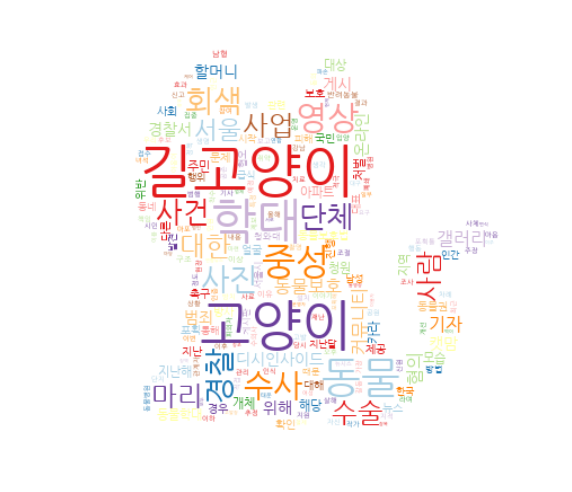

In [46]:
font = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wordcloud = WordCloud(
    font_path = font,    
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Paired',                               # 폰트 색깔 정하기
    width = 800,
    height = 800,
    mask = cat_mask
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_words, interpolation='bilinear')
plt.axis('off')
plt.show()